In [4]:
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
import pandas as pd
matplotlib.rcParams['figure.figsize'] = (8,6)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
sns.set()

In [2]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


mkt_price = np.array([[6.5757, 2.8223, 0.6335], 
                      [8.1165, 4.3850, 1.7263],
                      [6.0865, 3.1820, 1.2317], 
                      [7.7710, 4.7369, 2.4165]])

def bs_price(sigma, S, T, K, r=0.0411):
    K = K.reshape(12)
    T = T.reshape(12)
    d1 = (np.log(S/K) + (r + sigma ** 2 / 2) * T) / sigma / np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
def loss_fun(sigma, S, T, K, r=0.0411, mkt = mkt_price.reshape(12)):
    return np.sum((bs_price(sigma, S, T, K, r) - mkt) ** 2)
    
    
def imp_vol(S, T, K, r=0.0411):
    result = minimize(loss_fun, np.zeros(12)+0.1, (S, T, K), method='BFGS')
    return result

T = np.repeat(np.array([[0.25], [0.5], [0.75], [1]]), 3, axis=1)
K = np.array([np.arange(95, 110, 5), np.arange(95, 110, 5), np.arange(100, 115, 5), np.arange(100, 115, 5)])
implied_vol = imp_vol(100, T, K)
vol_surface = implied_vol.x.reshape(4,3)

In [3]:
vol_surface

array([[0.13198525, 0.11464017, 0.09921521],
       [0.13414201, 0.11706636, 0.10274535],
       [0.12949108, 0.11546319, 0.10177602],
       [0.14149475, 0.12777405, 0.11432678]])

In [105]:
from scipy.interpolate import RectBivariateSpline

In [221]:
vs = pd.DataFrame(vol_surface, index=[0.25, 0.50, 0.75, 1.00], columns=[-5, 0, 5])

In [222]:
vs

,-5,0,5
0.25,0.131985,0.114640,0.099215
0.50,0.134142,0.117066,0.102745
0.75,0.129491,0.115463,0.101776
1.00,0.141495,0.127774,0.114327


In [238]:
def data_points_interploate(vs, kind='cubic'):
    
    test_x = np.arange(0.25, 1.05, .05)
    test_y = np.arange(95, 105.5, .5)
    RectBivariateSpline(x=vs.index.values, y=vs.columns.values, z=vs.values, kx=3, ky=2)
    data_test = pd.DataFrame(f(test_x, test_y).T, index=test_y, columns=test_x)
    return data_test

In [239]:
data_inter = data_points_interploate(vs)

In [240]:
data_inter

,0.25,0.3,0.35,0.39999999999999997,0.44999999999999996,0.49999999999999994,0.5499999999999999,0.5999999999999999,0.6499999999999999,0.7,0.7499999999999999,0.7999999999999998,0.8499999999999999,0.8999999999999999,0.9499999999999998,0.9999999999999998
95.0,0.131985,0.133274,0.134134,0.134565,0.134568,0.134142,0.133287,0.132004,0.130448,0.129558,0.129491,0.130247,0.131825,0.134225,0.137449,0.141495
95.5,0.130164,0.131406,0.132242,0.132671,0.132694,0.132310,0.131521,0.130324,0.128872,0.128072,0.128073,0.128876,0.130482,0.132889,0.136099,0.140110
96.0,0.128363,0.129563,0.130377,0.130806,0.130849,0.130507,0.129778,0.128664,0.127310,0.126593,0.126658,0.127507,0.129138,0.131552,0.134749,0.138729
96.5,0.126580,0.127744,0.128540,0.128970,0.129034,0.128730,0.128060,0.127023,0.125760,0.125121,0.125247,0.126138,0.127793,0.130214,0.133399,0.137350
97.0,0.124817,0.125949,0.126731,0.127164,0.127247,0.126981,0.126366,0.125401,0.124223,0.123657,0.123839,0.124769,0.126448,0.128875,0.132050,0.135974
97.5,0.123073,0.124178,0.124949,0.125387,0.125490,0.125260,0.124696,0.123798,0.122699,0.122200,0.122435,0.123402,0.125102,0.127535,0.130701,0.134600
98.0,0.121348,0.122431,0.123195,0.123638,0.123762,0.123566,0.123050,0.122214,0.121188,0.120751,0.121033,0.122035,0.123755,0.126194,0.129352,0.133230
98.5,0.119642,0.120709,0.121468,0.121920,0.122064,0.121900,0.121429,0.120650,0.119690,0.119310,0.119636,0.120668,0.122407,0.124852,0.128004,0.131862
99.0,0.117956,0.119011,0.119769,0.120230,0.120394,0.120261,0.119831,0.119104,0.118204,0.117875,0.118242,0.119303,0.121059,0.123509,0.126655,0.130496
99.5,0.116288,0.117337,0.118097,0.118569,0.118754,0.118650,0.118258,0.117578,0.116732,0.116449,0.116851,0.117937,0.119709,0.122166,0.125307,0.129134


In [249]:
def surface_plot_2(df_temp, **kwargs):
    
    df_temp = df_temp.unstack().reset_index()
    df_temp.columns = ["X","Y","Z"]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(df_temp['Y'] - 100, df_temp['X'], df_temp['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.view_init(10, 60)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('Vol Surface Plot')
    ax.set_xlabel('Forward Strike Difference')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Implied Volatility')
    plt.show()

<IPython.core.display.Javascript object>


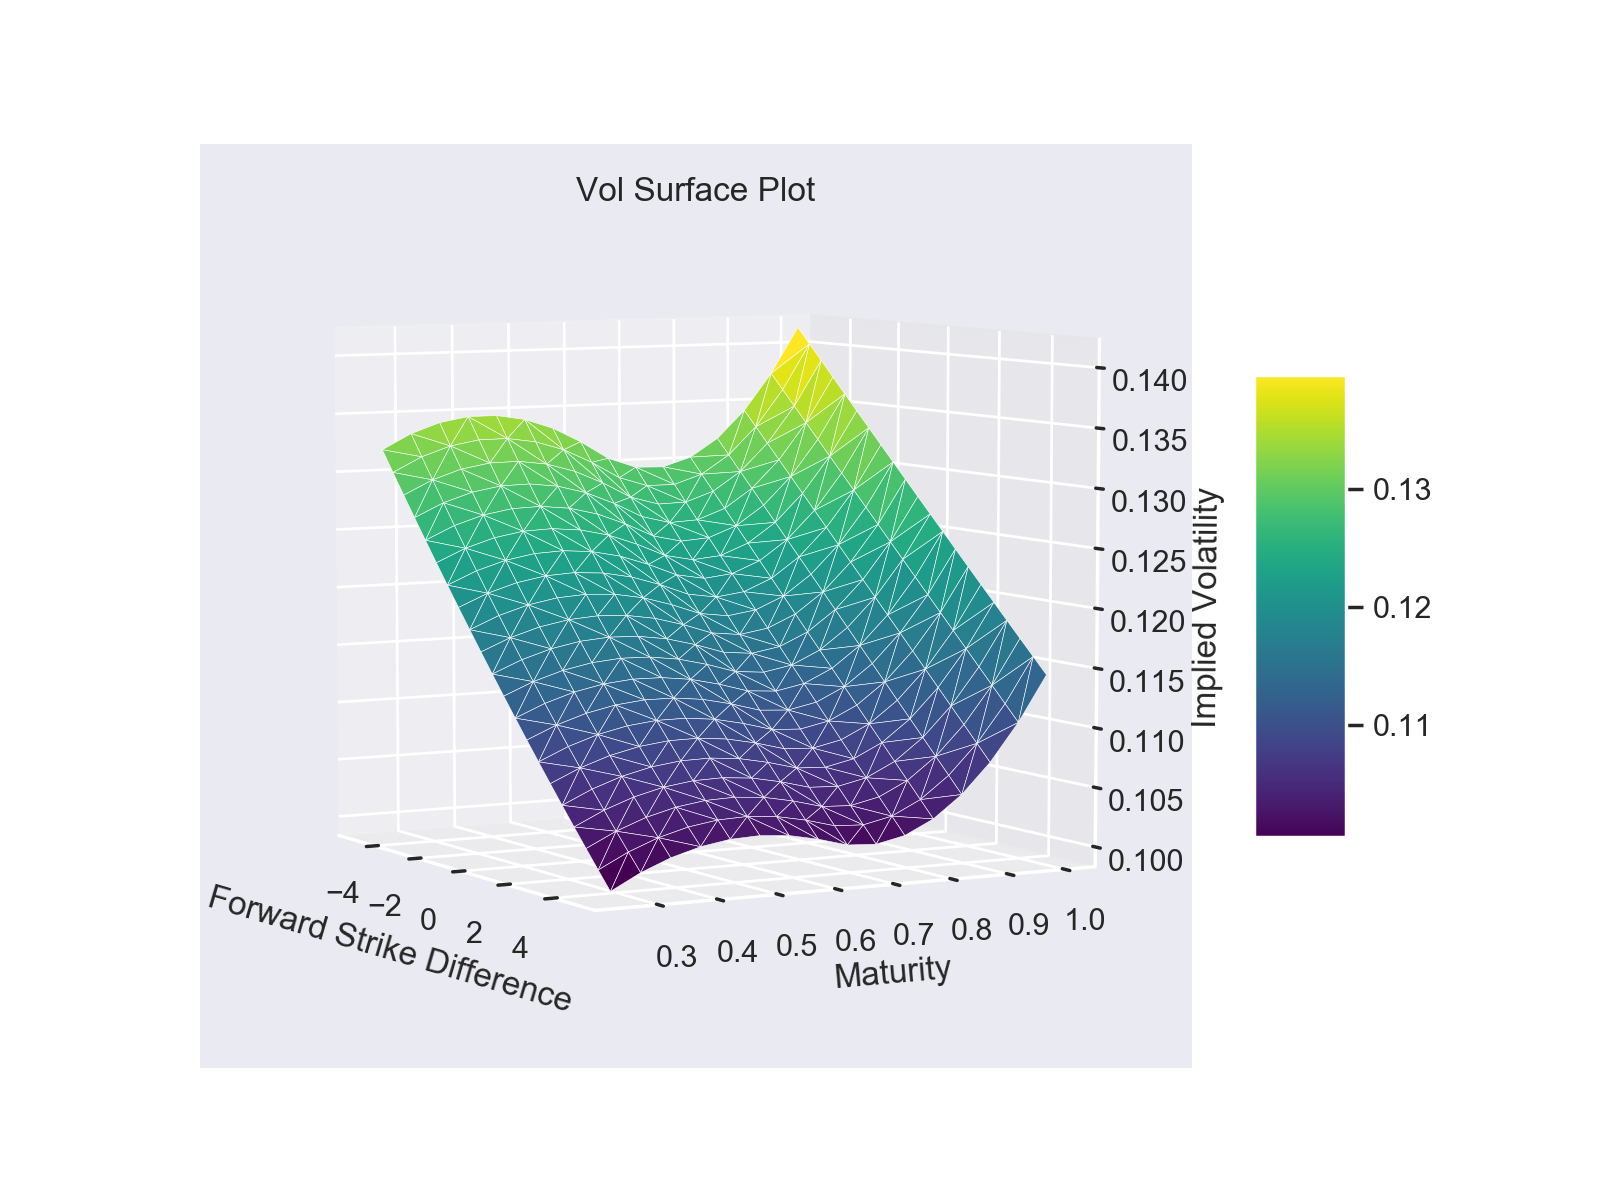

In [251]:
%matplotlib notebook
surface_plot_2(data_inter)

In [5]:
import plotly.graph_objects as go

In [6]:
# from IPython.display import IFrame
# IFrame(src= "https://dash-simple-apps.plotly.host/dash-3dsurfaceplot/", width="100%", height=950 ,frameBorder="0")

In [15]:
import plotly.graph_objects as go
def plotly_surface(df_temp):
    
    fig = go.Figure(data=[go.Surface(z=df_temp.values,
                                     y=df_temp.index.values, 
                                     x=df_temp.columns.values[::-1], 
                                     colorbar={"title": "Number", "len": 0.5, "thickness": 15},
                                     colorscale="YlGnBu", 
                                     opacity=0.8)],
                      layout=go.Layout(
#                                       title='Interpolated Volatility Surface', 
                                       autosize=True, height=800,
                                       scene={"xaxis": {'title': "Maturity",
                                              "tickfont": {"size": 10}, 'type': "linear"},
                                              "yaxis": {"title": "Forward Strike Difference", "tickfont": {"size": 10}, "tickangle": 1},
                                              "zaxis": {"title": "Implied Volatility", "tickfont": {"size": 10}},
                                              "camera": {"eye": {"x": 2, "y": 1, "z": 1.25}}, "aspectmode": "cube"}))


#     fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                       highlightcolor="limegreen",
#                                       project_z=True
#                                      ))

#     fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                       width=500, height=500,
#                       margin=dict(l=65, r=50, b=65, t=90))

    fig.show()

In [16]:
ddd = pd.read_pickle('surface.pkl')

In [17]:
plotly_surface(ddd)

In [261]:

def update_figure(selected):
    pd.options.mode.chained_assignment = None
    dff = df[df['State FIPS Code'] == selected]
    dff["county"] = (dff["County Name/State Abbreviation"].str.split(",", expand=True))[0]
    df1 = dff.loc[:, ["county", 'Labor Force', 'Employed', 'Unemployed']]
    df1.loc['Labor Force'] = pd.to_numeric(df1['Labor Force'], errors='ignore')
    df1.loc['Employed'] = pd.to_numeric(df1['Employed'], errors='ignore')
    df1.loc['Unemployed'] = pd.to_numeric(df1['Unemployed'], errors='ignore')
    trace = [go.Surface(y=df1.county.values, x=df1.Employed.values, z=df1.values, colorscale="YlGnBu", opacity=0.8,
                        colorbar={"title": "Number", "len": 0.5, "thickness": 15}, )]
    fig = go.Figure(data=trace,
                    layout=go.Layout(
#                                      title=f'Annual Average of Labor Force Data for {us.states.lookup(str(selected))}',
                                     autosize=True, height=800,
                                     scene={"xaxis": {'title': "Annual Average of Employed  (number)",
                                                      "tickfont": {"size": 10}, 'type': "linear"},
                                            "yaxis": {"title": f"County in {us.states.lookup(str(selected))} ",
                                                      "tickfont": {"size": 10}, "tickangle": 1},
                                            "zaxis": {
                                                'title': "         Annual Average of : <br>Labour Force,Employed,Unemployed  ",
                                                "tickfont": {"size": 10}},
                                            "camera": {"eye": {"x": 2, "y": 1, "z": 1.25}}, "aspectmode": "cube", }))
    return fig

In [264]:
plotly_surface(data_inter)

In [135]:
N = 70

fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.9,
#                    color='rgba(244,22,100,0.6)'
                  )])

In [136]:
# fig.update_layout(scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#                      yaxis = dict(nticks=4, range=[-50,100],),
#                      zaxis = dict(nticks=4, range=[-100,100],),),
#                      width=700,
#                      margin=dict(r=20, l=10, b=10, t=10))

fig.show()